# Kernel_PCA
---
PCA不进行分类的动作，而只做做数据预处理，将样本变换到一个容易分类（向最大化方差的方向，principal component axes，投影）的更低维的新的特征空间中。Kernel PCA比PCA多了一步，也即先升维（RBF包括多项式核均是升高到无穷维）再进行投影的动作，因为有些非线性可分的数据集只有在升维的视角下才线性可分。

KPCA是一种非线性主元分析方法，用于降维。主要思想：通过某种事先选择的非线性映射函数Ф将输入矢量X映射到一个高维线性特征空间F之中，然后在空间F中使用PCA方法计算主元成分，核主成分分析最主要是非线性映射函数Ф的选取。


以 Radial Basis Function（RBF） kernel PCA（不同的核，体现在代码上仅仅是一处细微的差别）为例进行说明:
1. __计算核矩阵（相似度矩阵） K__
    - RBF（Rational Basis Function）核函数
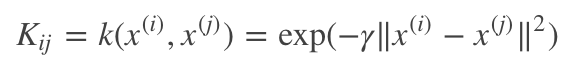

    - 多项式核
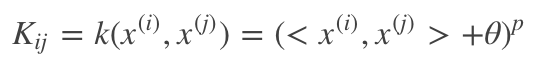
    
    - sigmoid型（hyperbolic tangent）核
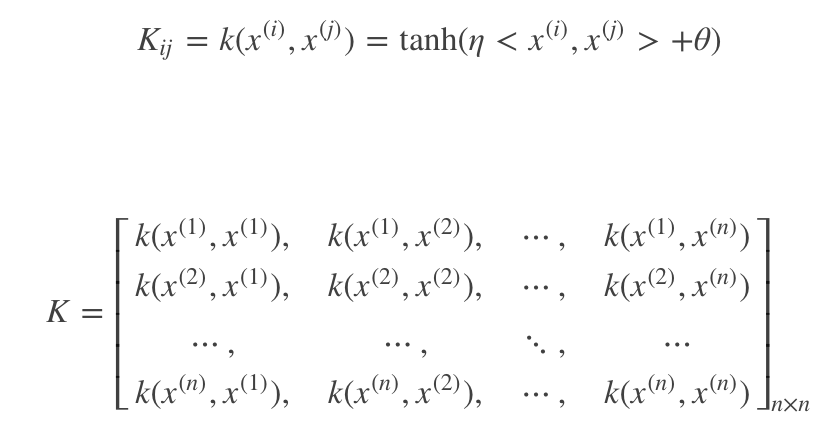
    
2. __Center the K__
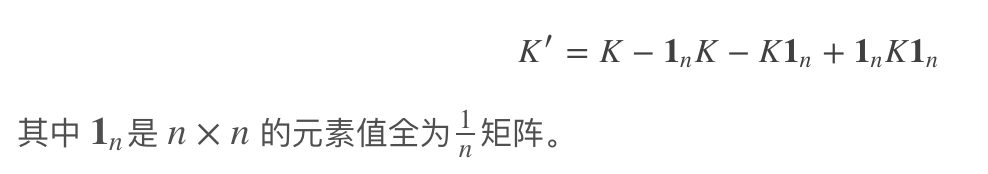

3. __对 K′进行特征值分解，获得对应于前 k个特征值的特征向量。__
    
    与标准PCA算法不同的是，这里获得特征向量不再是 principal component axes，而已经是全部样本在这些轴上的投影了，也即是我们所需的进行降维后的数据了。
    
### Refer to:
- https://blog.csdn.net/lanchunhui/article/details/50492482

In [15]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# load wine data "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv('data/wine.data', header=None) 
X, y = df.values[:, 1:], df.values[:, 0] 

print("------------- Show Data Set -----------")
print(X.shape)
print(y.shape)
print(X[:3])
print(y[:3])

# step 1 
X -= X.mean(0) 

# step 2 
N = X.shape[0] 
C = X.T.dot(X)/N 

# step 3 
Lambda, Q = np.linalg.eig(C) 

# step 4 
k = 3 
eigen_pairs = [(Lambda[i], Q[:, i]) for i in range(len(Lambda))] 
eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda k: k[0]) 
W = np.column_stack((eigen_pairs[i][1] for i in range(k))) 

# step 5 
X_pca = X.dot(W)
print("------------- Show Data Set after pca -----------")
print(X_pca.shape)
print(X_pca)


------------- Show Data Set -----------
(178, 13)
(178,)
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]
[1. 1. 1.]
------------- Show Data Set after pca -----------
(178, 3)
[[-3.18562979e+02 -2.14921307e+01 -3.13073470e+00]
 [-3.03097420e+02  5.36471768e+00 -6.82283550e+00]
 [-4.38061133e+02  6.53730945e+00  1.11322298e+00]
 [-7.33240139e+02 -1.92729032e-01  9.17257016e-01]
 [ 1.15714285e+01 -1.84899946e+01  5.54422076e-01]
 [-7.03231192e+02  3.32158674e-01 -9.49375334e-01]
 [-5.42971581e+02  1.35189666e+01 -2.12694283e+00]
 [-5.48401860e+02 -1.14494324e+01 -4.04924202e-02]
 [-2.98036863e+02  8.18015784e+00 -3.88097517e+00]
 [-2.980

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3


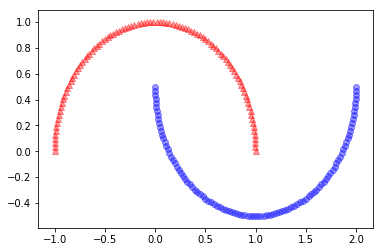

In [16]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib 
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons 

X, y = make_moons(n_samples=200, random_state=123) 
plt.scatter(X[y==0, 0], X[y==0, 1], color='r', marker='^', alpha=.4) 
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', marker='o', alpha=.4)
plt.show()

In [17]:
from scipy.spatial.distance import pdist, squareform 

def rbf_kpca(X, gamma, k): 
    # N = X.shape[0]    
    # sq_dist.shape = N*(N-1)/2 
    sq_dist = pdist(X, metric='sqeuclidean') 
    
    # mat_sq_dist.shape = (N, N)
    mat_sq_dist = squareform(sq_dist) 
     
    # step 1 
    K = np.exp(-gamma*mat_sq_dist) 
    
    # step 2 
    N = X.shape[0] 
    one_N = np.ones((N, N))/N 
    K = K - one_N.dot(K) - K.dot(one_N) + one_N.dot(K).dot(one_N) 
    
    # step 3 
    Lambda, Q = np.linalg.eig(K) 
    eigen_pairs = [(Lambda[i], Q[:, i]) for i in range(len(Lambda))] 
    eigen_pairs = sorted(eigen_pairs, reverse=True, key=lambda k: k[0]) 
    
    return np.column_stack((eigen_pairs[i][1] for i in range(k)))

In [18]:
X_kpca = rbf_kpca(X, gamma=15, k=2)
print(X_kpca.shape)
print(X_kpca)

(200, 2)
[[-0.0970251 +0.j  0.00166689+0.j]
 [ 0.07551587+0.j -0.09360162+0.j]
 [-0.09001402+0.j -0.06545319+0.j]
 [ 0.09698242+0.j -0.00402203+0.j]
 [-0.05902871+0.j -0.09376774+0.j]
 [ 0.02010562+0.j -0.04340973+0.j]
 [ 0.06345662+0.j  0.09595779+0.j]
 [-0.09665255+0.j  0.01865273+0.j]
 [ 0.09104938+0.j  0.0643085 +0.j]
 [ 0.09436499+0.j  0.04550568+0.j]
 [-0.05665112+0.j  0.09178683+0.j]
 [ 0.04938905+0.j  0.08473733+0.j]
 [ 0.05665112+0.j  0.09178683+0.j]
 [ 0.03908811+0.j  0.07123097+0.j]
 [ 0.03112105+0.j -0.06176106+0.j]
 [-0.08220076+0.j -0.0857776 +0.j]
 [-0.02010562+0.j -0.04340973+0.j]
 [ 0.06561453+0.j  0.09668424+0.j]
 [ 0.06350528+0.j -0.09569588+0.j]
 [-0.06129435+0.j -0.09489433+0.j]
 [ 0.07726876+0.j  0.09395824+0.j]
 [-0.04172276+0.j  0.07501557+0.j]
 [ 0.08644848+0.j  0.07955893+0.j]
 [ 0.08061964+0.j  0.09039549+0.j]
 [ 0.07729188+0.j -0.09211288+0.j]
 [-0.07726876+0.j  0.09395824+0.j]
 [ 0.06124211+0.j  0.0948968 +0.j]
 [-0.07367254+0.j -0.09476951+0.j]
 [ 0.095520

## 一个非线性可分的数据集

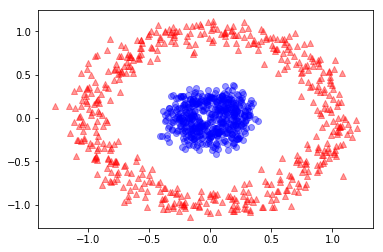

In [19]:
from sklearn.datasets import make_circles 

X, y = make_circles(n_samples=1000, noise=.1, factor=.2, random_state=123) 
plt.scatter(X[y==0, 0], X[y==0, 1], color='r', marker='^', alpha=.4) 
plt.scatter(X[y==1, 0], X[y==1, 1], color='b', marker='o', alpha=.4) 
plt.show()

In [20]:
X_kpca = rbf_kpca(X, gamma=15, k=2)
print(X_kpca.shape)
print(X_kpca)

(1000, 2)
[[-0.02896516+0.j  0.00206428+0.j]
 [-0.02994448+0.j  0.00210431+0.j]
 [-0.02928948+0.j  0.00230645+0.j]
 ...
 [-0.0306626 +0.j  0.00218654+0.j]
 [-0.03119776+0.j  0.00221283+0.j]
 [ 0.04705505+0.j -0.01054699+0.j]]


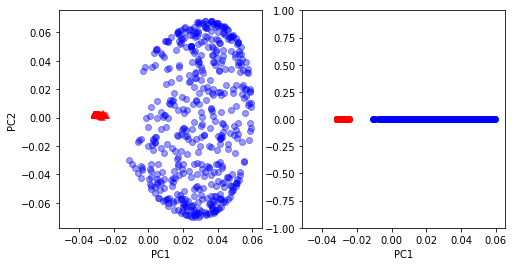

In [21]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4)) 

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='r', marker='^', alpha=.4) 
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='b', marker='o', alpha=.4) 

label_count = np.bincount(y) 
# 统计各类别出现的次数 
# label_count[0] = 500 
# label_count[1] = 500 

ax[1].scatter(X_kpca[y==0, 0], np.zeros(label_count[0]), color='r') 
ax[1].scatter(X_kpca[y==1, 0], np.zeros(label_count[1]), color='b') 
# y轴置零 
# 投影到x轴 

ax[1].set_ylim([-1, 1]) 
ax[0].set_xlabel('PC1') 
ax[0].set_ylabel('PC2') 
ax[1].set_xlabel('PC1') 

plt.show()


## Example with sklearn
---

In [27]:
from sklearn.decomposition import KernelPCA
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np  


l=[]
with open('data/wine.data','r') as fd:
  
    line= fd.readline()
    while line:
        if line =="":
            continue
  
        line = line.strip()
        word = line.split(",")
        l.append(word)
        line= fd.readline()
 
data_l=DataFrame(l)
print("---- Show data frame ---")
print (data_l)

dataMat = np.array(data_l)  
 
# = PCA(n_components=2)  
 
kpca = KernelPCA(kernel='rbf',gamma=1,n_components=3)
newMat = kpca.fit_transform(dataMat)  
 
data1 = DataFrame(newMat)
data1.to_csv('test_KPCA.csv',index=False,header=False)
print("---- Show data after KernelPCA ---")
print (data1)
print("Only 3 transformed features are generated!")

---- Show data frame ---
    0      1     2     3     4    5     6     7    8     9         10    11  \
0    1  14.23  1.71  2.43  15.6  127   2.8  3.06  .28  2.29      5.64  1.04   
1    1   13.2  1.78  2.14  11.2  100  2.65  2.76  .26  1.28      4.38  1.05   
2    1  13.16  2.36  2.67  18.6  101   2.8  3.24   .3  2.81      5.68  1.03   
3    1  14.37  1.95   2.5  16.8  113  3.85  3.49  .24  2.18       7.8   .86   
4    1  13.24  2.59  2.87    21  118   2.8  2.69  .39  1.82      4.32  1.04   
5    1   14.2  1.76  2.45  15.2  112  3.27  3.39  .34  1.97      6.75  1.05   
6    1  14.39  1.87  2.45  14.6   96   2.5  2.52   .3  1.98      5.25  1.02   
7    1  14.06  2.15  2.61  17.6  121   2.6  2.51  .31  1.25      5.05  1.06   
8    1  14.83  1.64  2.17    14   97   2.8  2.98  .29  1.98       5.2  1.08   
9    1  13.86  1.35  2.27    16   98  2.98  3.15  .22  1.85      7.22  1.01   
10   1   14.1  2.16   2.3    18  105  2.95  3.32  .22  2.38      5.75  1.25   
11   1  14.12  1.48  2.32  

### The algorithm failed to converge when using "gamma=10".

In [26]:
# = PCA(n_components=2)  
 
kpca = KernelPCA(kernel='rbf',gamma=10,n_components=3)
newMat = kpca.fit_transform(dataMat)  
 
data1 = DataFrame(newMat)
data1.to_csv('test_KPCA.csv',index=False,header=False)
print("---- Show data after KernelPCA ---")
print (data1)

LinAlgError: unrecoverable internal error.